### Portfolio Project: Retail Mall Customer Segmentation

#### Overview
This project analyzes customer data from a retail mall to identify distinct customer segments using exploratory data analysis (EDA) and clustering techniques. The focus is on understanding customer behavior and demographics to inform targeted marketing strategies.

#### Case Study
A fictional retail mall chain seeks to optimize its marketing efforts and improve customer retention. By segmenting customers based on demographic, economic, and behavioral attributes, the chain aims to tailor promotions, enhance loyalty programs, and allocate resources efficiently across its branches.

#### Project Objectives
- Perform EDA to uncover key patterns in customer demographics, spending habits, and visit frequency.
- Segment customers into meaningful clusters using K-means clustering for actionable insights.
- Provide recommendations for personalized marketing and operational improvements based on segment characteristics.

#### Dataset
The dataset is **synthetic**, generated to simulate real-world retail mall customer data.

The dataset includes the following columns:

- **CustomerID**:  A unique identifier for each customer in the dataset.
- **Gender**: The gender of the customer (e.g., Male, Female).
- **Age**: The customer's age in years.
- **Annual Income (₦)**: The customer's yearly income in Nigerian Naira (₦).
- **Spending Score (1–100)**: A score assigned to the customer based on their spending behavior, ranging from 1 (low spender) to 100 (high spender).
- **Marital Status**: The marital status of the customer (e.g., Single, Married, Divorced, Widowed).
- **Profession**: The customer's profession or occupation (e.g., Engineer, Teacher, Entrepreneur).
- **Membership Duration (Years)**: The number of years the customer has held membership with the mall or service.
- **Mall Branch**: The branch of the mall frequented by the customer (e.g., Branch A, Branch B).
- **City Type**: The type of city the customer resides in (e.g., Metropolitan, Suburban, Rural).
- **Frequency of Visits/Month**: The average number of visits the customer makes to the mall or service per month.
- **Average Transaction Value (₦)**: The average amount spent by the customer per transaction, in Nigerian Naira (₦).
- **Loyalty Card Holder (Yes/No)**: Indicates whether the customer possesses a loyalty card (Yes or No).
- **Preferred Payment Method**: The customer's most commonly used payment method (e.g., Cash, Credit Card, Mobile Payment).

#### Task
- Conduct EDA to extract insights on customer demographics, income-spending relationships, and behavioral trends.
- Apply K-means clustering to segment customers based on key features (e.g., Age, Income, Spending Score, Visit Frequency, Transaction Value).
- Interpret clusters to recommend strategies for customer engagement and retention.

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [12]:
df = pd.read_csv('C:\\Users\\WINDOW 10\\Downloads\\retail_mall_customers.csv')

In [18]:
df.head()

,CustomerID,Gender,Age,Annual Income (₦),Spending Score (1–100),Marital Status,Profession,Membership Duration (Years),Mall Branch,City Type,Frequency of Visits/Month,Average Transaction Value (₦),Loyalty Card Holder (Yes/No),Preferred Payment Method
0,1,Male,49,4955725.0,56,Married,Student,8.5,A,Rural,28,24445,No,Transfer
1,2,Female,53,5320136.0,67,Married,Lawyer,5.1,C,Suburban,15,44880,No,POS
2,3,Male,67,1488824.0,95,Single,Business Owner,2.5,B,Urban,28,49386,No,Transfer
3,4,Male,54,187246.0,62,Divorced,Lawyer,4.7,C,Urban,20,43065,Yes,POS
4,5,Male,65,1735250.0,81,Widowed,Doctor,8.5,B,Rural,8,33870,Yes,POS


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CustomerID                     40000 non-null  int64  
 1   Gender                         39600 non-null  object 
 2   Age                            39601 non-null  object 
 3   Annual Income (₦)              39402 non-null  float64
 4   Spending Score (1–100)         40000 non-null  int64  
 5   Marital Status                 40000 non-null  object 
 6   Profession                     39600 non-null  object 
 7   Membership Duration (Years)    40000 non-null  float64
 8   Mall Branch                    40000 non-null  object 
 9   City Type                      40000 non-null  object 
 10  Frequency of Visits/Month      40000 non-null  int64  
 11  Average Transaction Value (₦)  40000 non-null  int64  
 12  Loyalty Card Holder (Yes/No)   40000 non-null 

In [26]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 14)


In [30]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 CustomerID                         0
Gender                           400
Age                              399
Annual Income (₦)                598
Spending Score (1–100)             0
Marital Status                     0
Profession                       400
Membership Duration (Years)        0
Mall Branch                        0
City Type                          0
Frequency of Visits/Month          0
Average Transaction Value (₦)      0
Loyalty Card Holder (Yes/No)       0
Preferred Payment Method           0
dtype: int64


In [48]:
#Dropping rows with missing values
df.dropna(subset=['Age', 'Annual Income (₦)', 'Gender', 'Profession'], inplace=True)
df.shape

(38257, 14)

In [85]:
print(df['Age'].value_counts())

Age
65         429
34         423
32         421
53         420
69         402
          ... 
43.0       313
66.0       304
23.0       303
60.0       296
unknown    174
Name: count, Length: 105, dtype: int64


In [89]:
# Remove rows with 'unknown' in the Age column
df = df[df['Age'] != 'unknown']

In [36]:
# Check for negative values in the Annual Income column
negative_income = df[df['Annual Income (₦)'] < 0]

# Optionally, print the count of negative values
print("\nNumber of rows with negative Annual Income:", len(negative_income))


Number of rows with negative Annual Income: 896


In [38]:
# Check for negative values in the Average Transaction Value column
negative_transaction = df[df['Average Transaction Value (₦)'] < 0]

# Print the count of negative values
print("\nNumber of rows with negative Average Transaction Value:", len(negative_transaction))


Number of rows with negative Average Transaction Value: 276


In [52]:
# Drop rows with negative values in the specified columns
df = df[(df['Annual Income (₦)'] >= 0) & (df['Average Transaction Value (₦)'] >= 0)]

# Verify the shape of the cleaned dataset
print("Shape of the dataset after dropping rows with negative values:", df.shape)

Shape of the dataset after dropping rows with negative values: (37132, 14)


In [91]:
#Statistical summary
df.describe()

,CustomerID,Age,Annual Income (₦),Spending Score (1–100),Membership Duration (Years),Frequency of Visits/Month,Average Transaction Value (₦)
count,36958.000000,36958.000000,3.695800e+04,36958.000000,36958.000000,36958.000000,36958.000000
mean,9992.939147,43.495454,3.086792e+06,50.864441,5.233189,15.478976,50390.103523
std,5777.873413,15.031256,1.415485e+06,29.095042,2.751210,8.642611,19464.741167
min,1.000000,18.000000,1.263000e+03,1.000000,0.500000,1.000000,90.000000
25%,4976.000000,31.000000,2.075080e+06,26.000000,2.800000,8.000000,36868.000000
50%,9985.500000,43.000000,3.045844e+06,51.000000,5.300000,16.000000,50183.000000
75%,14993.750000,56.000000,4.044725e+06,76.000000,7.600000,23.000000,63323.000000
max,20000.000000,69.000000,8.907754e+06,100.000000,10.000000,30.000000,125324.000000


## Distribution of age

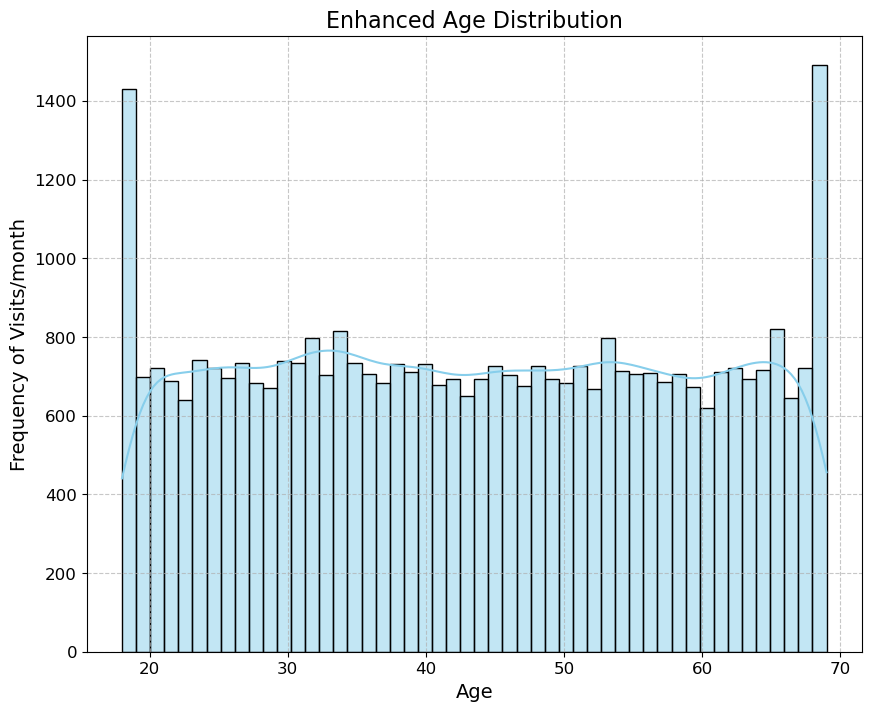

In [101]:
df['Age'] = df['Age'].astype(int)
plt.figure(figsize=(10, 8))  # Make the plot larger
sns.histplot(df['Age'], bins=50, kde=True, color='skyblue', edgecolor='black')  # Increase bins, add styling
plt.title("Enhanced Age Distribution", fontsize=16)  # Larger title font
plt.xlabel("Age", fontsize=14)  # Larger x-axis label
plt.ylabel("Frequency of Visits/month", fontsize=14)  # Larger y-axis label
plt.xticks(fontsize=12)  # Larger x-axis tick labels
plt.yticks(fontsize=12)  # Larger y-axis tick labels
plt.grid(True, linestyle='--', alpha=0.7)  # Subtle grid styling
plt.show()

## Spending Score by Gender

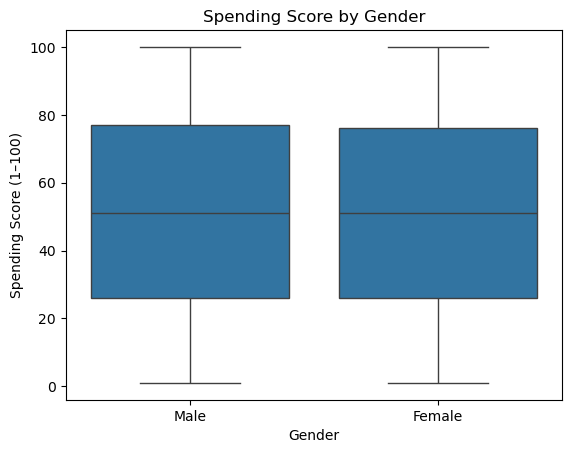

In [103]:
sns.boxplot(x='Gender', y='Spending Score (1–100)', data=df)
plt.title("Spending Score by Gender")
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Student'),
  Text(1, 0, 'Lawyer'),
  Text(2, 0, 'Business Owner'),
  Text(3, 0, 'Unemployed'),
  Text(4, 0, 'Engineer'),
  Text(5, 0, 'Doctor'),
  Text(6, 0, 'Banker'),
  Text(7, 0, 'Teacher')])

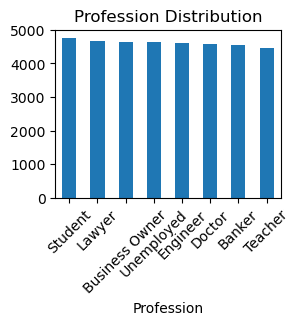

In [110]:
plt.subplot(2, 2, 3)
df['Profession'].value_counts().plot(kind='bar')
plt.title('Profession Distribution')
plt.xticks(rotation=45)

## Customer Segmentation

In [118]:
# Prepare data for clustering
features = ['Age', 'Annual Income (₦)', 'Spending Score (1–100)', 
           'Frequency of Visits/Month', 'Average Transaction Value (₦)']
X = df[features]

In [120]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

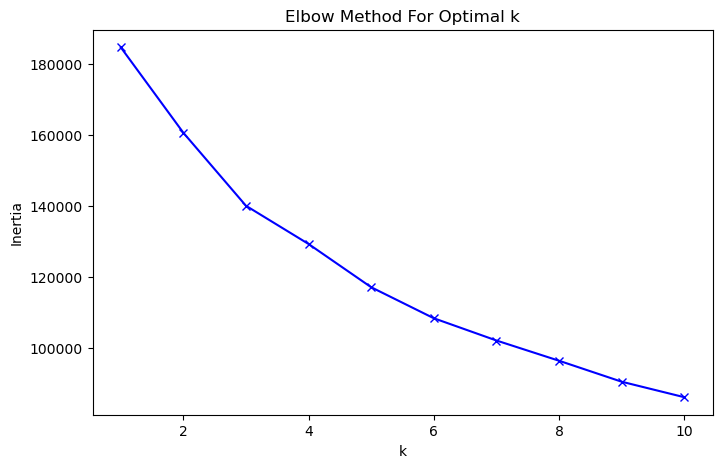

In [122]:
# Determine optimal number of clusters using Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
#Plot the Elbow method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [140]:
# Apply K-means with chosen number of clusters (let's say 4 based on elbow plot)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

In [142]:
# Analyze clusters
cluster_summary = df.groupby('Cluster')[features].mean()
print("\nCluster Summary:")
print(cluster_summary)


Cluster Summary:
               Age  Annual Income (₦)  Spending Score (1–100)  \
Cluster                                                         
0        32.964840       2.722866e+06               44.534546   
1        30.958609       2.929575e+06               56.950501   
2        51.206299       4.760557e+06               53.493159   
3        57.932394       2.154888e+06               48.634473   

         Frequency of Visits/Month  Average Transaction Value (₦)  
Cluster                                                            
0                        15.720170                   69040.931800  
1                        14.843610                   34199.036911  
2                        15.331564                   51725.216914  
3                        15.976151                   47765.012023  


In [ ]:
sns.scatterplot(data=df, x='Annual Income (₦)', y='Spending Score (1–100)', hue='Cluster', palette='Set2')
plt.title("Customer Segments")
plt.show()

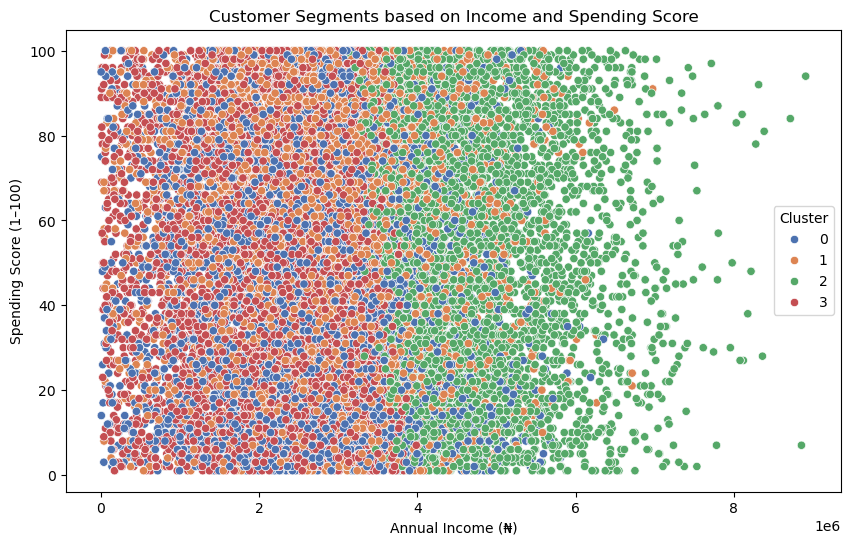

In [152]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (₦)', y='Spending Score (1–100)', 
                hue='Cluster', palette='deep')
plt.title('Customer Segments based on Income and Spending Score')
plt.show()

## Pairplot for All Features

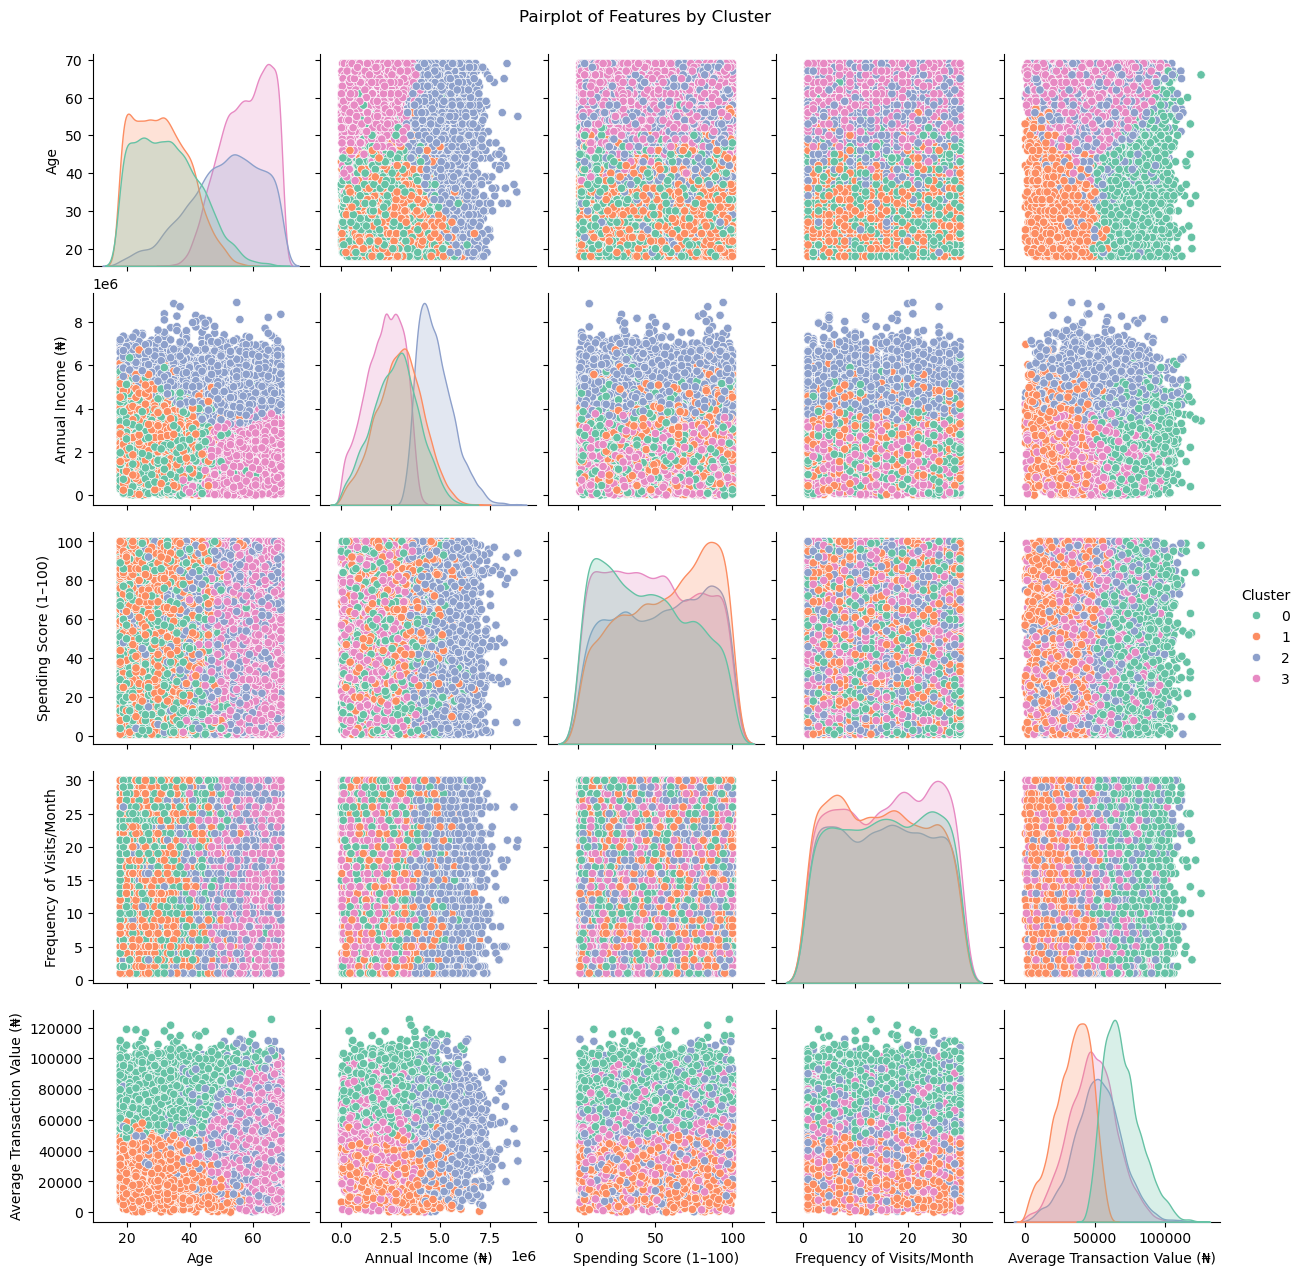

In [154]:
sns.pairplot(df, vars=['Age', 'Annual Income (₦)', 'Spending Score (1–100)', 
                       'Frequency of Visits/Month', 'Average Transaction Value (₦)'], 
             hue='Cluster', palette='Set2', diag_kind='kde')
plt.suptitle("Pairplot of Features by Cluster", y=1.02)
plt.show()

### Few key Insights from EDA

- **Age Distribution**: The customer base spans a wide age range (18–69), with peaks around 25–35 and 50–65, indicating two primary age groups: young adults and older customers.
  
- **Gender Balance**: After removing unknowns, the gender split is roughly even, suggesting no strong gender bias in the customer pool.

- **Profession Trends**: Lawyers, Students, and Teachers dominate, comprising the majority of professions, suggesting a mix of professional and academic customers.

- **Payment Preferences**: POS and Transfer are the most popular methods (over 60% combined), while Cash usage persists, especially in rural areas.


# Customer Segmentation Analysis

## **Summary of Results**
Based on the customer segmentation analysis performed using K-Means clustering on the features:
- **Age**
- **Annual Income (₦)**
- **Spending Score (1–100)**
- **Frequency of Visits/Month**
- **Average Transaction Value (₦)**

The dataset was grouped into **4 distinct clusters** as follows:

### **Cluster 0**:
- **Age**: ~33 years (young adults).
- **Annual Income**: ~2.72 million ₦.
- **Spending Score**: ~44.5 (moderate spender).
- **Frequency of Visits**: ~15.7 visits per month.
- **Average Transaction Value**: ~69,040 ₦ (highest among all clusters).
- **Description**: This cluster represents relatively young professionals or middle-income individuals who visit frequently and spend significant amounts during each transaction.

### **Cluster 1**:
- **Age**: ~31 years (younger adults).
- **Annual Income**: ~2.93 million ₦.
- **Spending Score**: ~57 (high spender).
- **Frequency of Visits**: ~14.8 visits per month (slightly less frequent than others).
- **Average Transaction Value**: ~34,199 ₦ (lowest among all clusters).
- **Description**: These are younger customers who make frequent visits and spend smaller amounts, showing high overall spending scores.

### **Cluster 2**:
- **Age**: ~51 years (middle-aged).
- **Annual Income**: ~4.76 million ₦ (highest among all clusters).
- **Spending Score**: ~53.5 (moderate spender).
- **Frequency of Visits**: ~15.3 visits per month.
- **Average Transaction Value**: ~51,725 ₦.
- **Description**: This cluster represents wealthy, middle-aged individuals who balance their spending across moderate spending scores and transaction values.

### **Cluster 3**:
- **Age**: ~58 years (older adults).
- **Annual Income**: ~2.15 million ₦ (lowest among all clusters).
- **Spending Score**: ~48.6.
- **Frequency of Visits**: ~15.9 visits per month (highest frequency).
- **Average Transaction Value**: ~47,765 ₦.
- **Description**: These are older, low-income individuals who are frequent visitors with moderate transaction sizes.

---

## **Meaningful Insights and Actionable Recommendations**

### **Insight 1: High Value Customers (Cluster 2)**
- **Observation**: This cluster includes high-income, middle-aged individuals with moderate spending scores and average transaction values.
- **Action**: Target these customers with **premium or luxury offerings**, such as exclusive membership programs, VIP benefits, or high-end product bundles to maximize revenue.

### **Insight 2: Young High Spenders (Cluster 1)**
- **Observation**: Young customers with high spending scores but low transaction values.
- **Action**: Offer **loyalty reward programs** or **discount tiers** for higher-value purchases to encourage them to spend more per transaction.

### **Insight 3: Frequent High-Value Shoppers (Cluster 0)**
- **Observation**: Frequent visitors with high transaction values but moderate spending scores.
- **Action**: Introduce **bundled promotions** (e.g., “Spend ₦100,000 and save 10%”) to boost overall spending while capitalizing on their already high transaction sizes.

### **Insight 4: Frequent Low-Income Visitors (Cluster 3)**
- **Observation**: Older individuals with low income but frequent visits and moderate spending.
- **Action**: Provide **value-focused packages** such as discounted product bundles or subscription services for regular purchases to maintain their loyalty.

---

## **Strategic Applications**
1. **Marketing Campaigns**:
   - Use tailored email campaigns for each cluster, highlighting offers aligned with their spending habits and preferences.
2. **Resource Allocation**:
   - Focus premium marketing efforts (e.g., personalized ads) on high-value clusters like Cluster 0 and Cluster 2.
3. **Customer Retention**:
   - Strengthen engagement strategies for Clusters 1 and 3 to prevent churn and increase their transaction values.

### Final Thoughts
This segmentation provides valuable insights into customer behaviors. By tailoring marketing strategies and service offerings to the unique characteristics of each cluster, the business can maximize revenue, enhance customer satisfaction, and drive long-term loyalty.